# Clustering

 It is a form of unsupervised machine learning in which observations are grouped into clusters based on similarities in their features.

This kind of machine learning is considered unsupervised because it doesn’t make use of previously known label values to train a model.

In a clustering model, the label is the cluster to which the observation is assigned, based purely on its features.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('seeds.csv')
data.head(4)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0


In [3]:
features = data[data.columns[0:6]]
# extracting the 6 columns of dataset and storing them in features variable

features.sample(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
93,18.59,16.05,0.9066,6.037,3.860,6.001
168,11.35,13.12,0.8291,5.176,2.668,4.337
40,13.54,13.85,0.8871,5.348,3.156,2.587
2,14.29,14.09,0.9050,5.291,3.337,2.699
110,18.45,16.12,0.8921,6.107,3.769,2.235
86,18.88,16.26,0.8969,6.084,3.764,1.649
63,13.22,13.84,0.8680,5.395,3.070,4.157
146,11.43,13.13,0.8335,5.176,2.719,2.221
128,20.16,17.03,0.8735,6.513,3.773,1.910
208,11.84,13.21,0.8521,5.175,2.836,3.598


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [5]:
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

In [7]:
pca = PCA(n_components=3).fit(scaled_features)

features_2d = pca.transform(scaled_features)

features_2d[0:10]

array([[ 0.11883593, -0.09382469, -0.16049153],
       [ 0.0696878 , -0.31077233, -0.17974885],
       [-0.03499184, -0.37044705,  0.15798291],
       [-0.06582089, -0.36365235,  0.07233949],
       [ 0.32594892, -0.37695797, -0.02399716],
       [-0.02455447, -0.31060184,  0.0623804 ],
       [-0.00769646, -0.07594931,  0.04746403],
       [-0.05646955, -0.26696284,  0.06036865],
       [ 0.38196305, -0.05149471, -0.19626995],
       [ 0.35701044, -0.17697998, -0.09618274]])

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

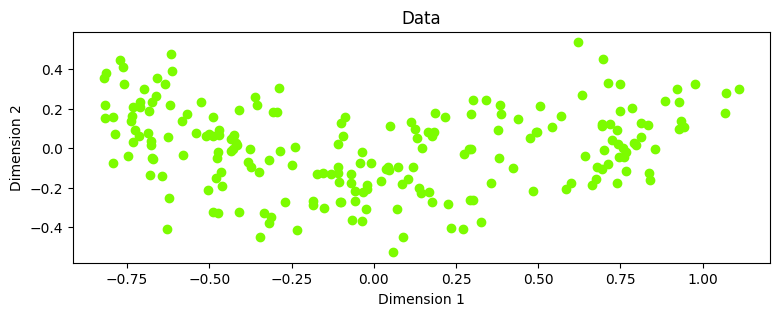

In [14]:
plt.figure(figsize=(9,3))

plt.scatter(features_2d[:,0],features_2d[:,1] , color = 'lawngreen')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.title('Data')
plt.show()

In [15]:
# calculating WCSS

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [27]:
k_values = range(1, 11)

In [17]:
wcss = []  # List to store the WCSS values for different k values

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

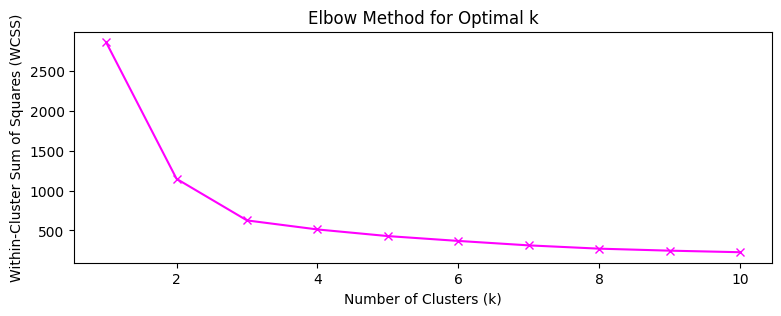

In [24]:
plt.figure(figsize=(9, 3))
plt.plot(k_values, wcss, marker='x', linestyle='-' , color = 'fuchsia' )

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()